# Data Visualization with Python
## Matplotlib

There are a ton of great options for data visualization in Python but we're only going to cover two of them. The first being one of the oldest and most well established, Matplotlib. Matplotlib was built to mimick a lot of the syntax from Matlabs plotting package. The other library we'll cover today is Seaborns which is built on top of Matplotlib (this is pretty common to have another library built on top of matplotlib). 

In this tutorial, we aren't going to use any big datasets. We would idealy be using pandas or xarray or something to that effect if we were using real datasets and up to this point, we haven't covered any of that material. We'll be fixing that in an upcoming tutorial. We **could** use numpy to read in csv data but this isn't typical and I don't see much reason to try to find a work around just to avoid pandas. We can demonstrate what we need here with some simple toy datasets.

## First Up - Matplotlib

### Importing matplotlib

In [1]:
import matplotlib.pyplot as plt # This is the typical way of importing matplotlib
# Below is a cell magic that will let jupyter display your plots inline in your notebook. I beleive this is default behavior now
# as typically, even without this line, my plots show up inline.
%matplotlib inline 

### Establishing our Data

In [2]:
precip = [0, 0, 0, 12, 30, 10, 5, 0, 0, 0] # in mm/hr
windSpd = [10, 15, 14, 20, 30, 12, 10, 5, 3, 8] # in mph
trafficSpd = [65, 68, 66, 62, 30, 41, 58, 65, 70, 70] # minimum traffic speed
hour = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21] # hour of day

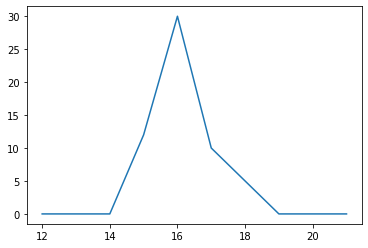

In [3]:
plt.plot(hour, precip); # pretty intuitively, plot accepted an x and y value.
# notice the semicolon, I tend to put that there to suprress the following output from matplotlib: [<matplotlib.lines.Line2D at 0x21259cf8278>]

Our plot is honestly pretty bad at this point so lets add some of the elements a good figure should have, things like labels, a title, and a legend.

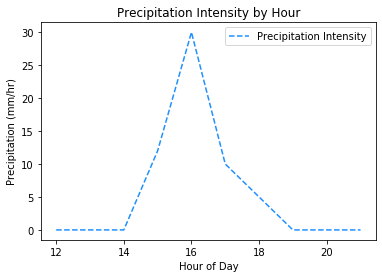

In [4]:
plt.plot(hour, precip, color='dodgerblue', linestyle='--', label='Precipitation Intensity')
plt.legend() # Notice, the labeling was done in the call to plot above!
plt.xlabel('Hour of Day')
plt.ylabel('Precipitation (mm/hr)')
plt.title('Precipitation Intensity by Hour')
plt.show()

In short, this is how Matplotlib works! You're just building a plot up piece by piece. Things will be done in the order that you specify.

Notice the plt.show() this time. It isn't absolutely necessary in Jupyter Notebooks to use this but it does supress the matplotlib output that was mentioned previously without the use of semicolons. If you search tutorials on Matplotlib, you'll see it getting used quite often when the plot is finished and ready to be shown.

Okay, so what about adding more to the plot? We've got other data, let's use it!

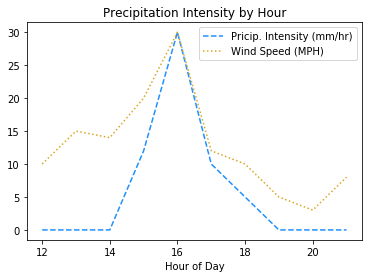

In [5]:
plt.plot(hour, precip, color='dodgerblue', linestyle='--', label='Pricip. Intensity (mm/hr)')
### NEW LINES ###
plt.plot(hour, windSpd, color='goldenrod', linestyle=':', label='Wind Speed (MPH)')
################
plt.legend()
plt.xlabel('Hour of Day')
# Since we're now using the y axis for multiple things, we'll remove the label and let the legend speak for the units.
#plt.ylabel('Precipitation (mm/hr)')
plt.title('Precipitation Intensity by Hour')
plt.show()

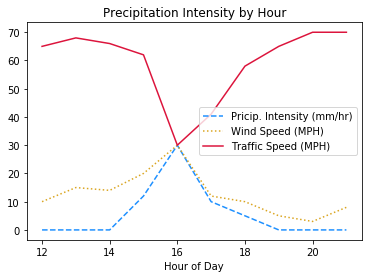

In [6]:
plt.plot(hour, precip, color='dodgerblue', linestyle='--', label='Pricip. Intensity (mm/hr)')
plt.plot(hour, windSpd, color='goldenrod', linestyle=':', label='Wind Speed (MPH)')
### NEW LINES ###
plt.plot(hour, trafficSpd, color='crimson', linestyle='-', label='Traffic Speed (MPH)')
################
plt.legend()
plt.xlabel('Hour of Day')
# Since we're now using the y axis for multiple things, we'll remove the label and let the legend speak for the units.
#plt.ylabel('Precipitation (mm/hr)')
plt.title('Precipitation Intensity by Hour')
plt.show()

Typical wisdom to add the traffic speed to this same figure would be to add a second y-axis and be done with it. The biggest issue with this is that it is really easy to manipulate the axis to drive an agenda or point that the data doesn't really support. There may be legitimate reasons to use a second y-axis, just keep in mind that it is easy to manipulate.

But, needing access to the plot elements does bring us to our next point.

## Using the object oriented nature of Matplotlib

Matplotlib uses object oriented design quite heavily. Because of that, you tend to see a lot of different ways to do the exact same thing. Above, you saw plots just being generated and the axes being directly modified. Now we're going to save these object to their own variables that we can interact with.

Matplotlib has a plt.figure function that I'm not going to get into. The reason being is that the subplots function can do the same thing but give you acess to both the figure (the entire plotting area, that includes however many plots you want) and the axes for your plotting area.

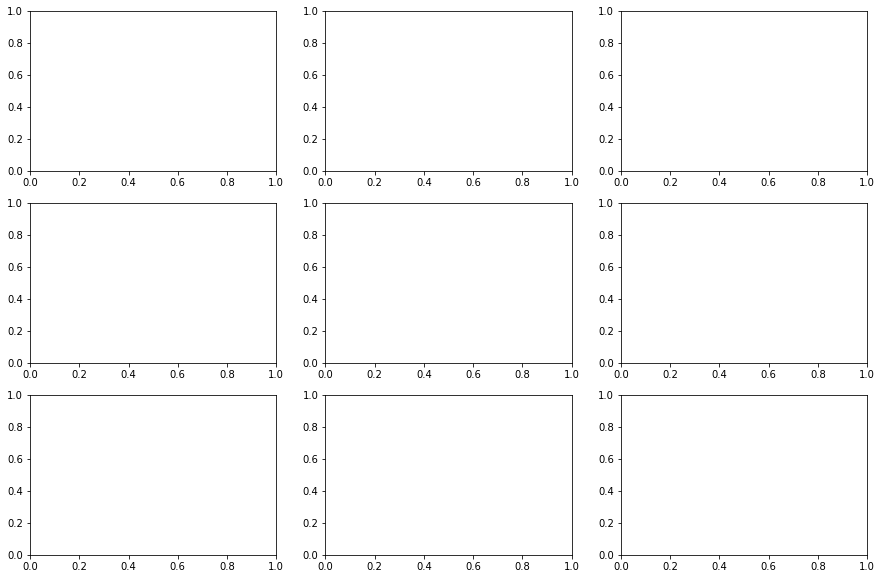

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10)) # initialize the plot. NOTE: Figure size is in inches, it's width by height.

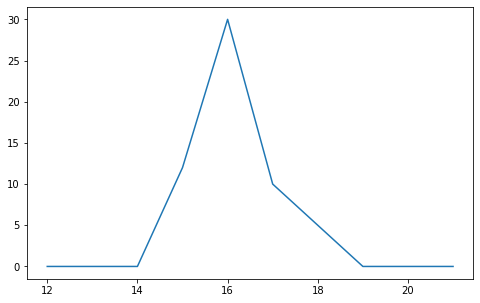

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.plot(hour, precip) # since the plot is only one row and one col, we don't have to do anything special. If we add more, we have to toy with it some.
plt.show()

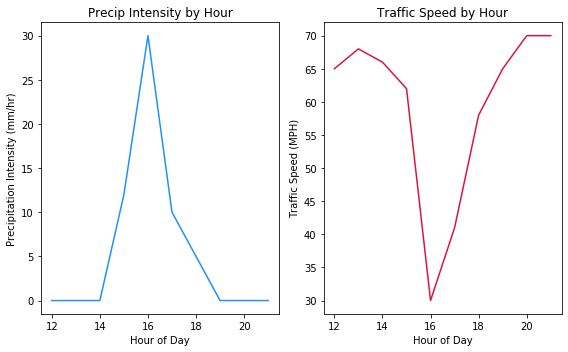

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5), sharex=True) # sharing the x axis will lock in the same settings for both plots

ax[0].plot(hour, precip, color='dodgerblue', label='Precip Intensity (mm/hr)')
ax[0].set_title('Precip Intensity by Hour')
ax[0].set_ylabel('Precipitation Intensity (mm/hr)')
ax[0].set_xlabel('Hour of Day')

ax[1].plot(hour, trafficSpd, color='crimson', label='Traffic Speed (MPH)')
ax[1].set_title('Traffic Speed by Hour')
ax[1].set_ylabel('Traffic Speed (MPH)')
ax[1].set_xlabel('Hour of Day')

fig.tight_layout() # just tightens up the area around the plots
plt.show()

This may be a good time to mention, in my personal opinion the default styling of matplotlib is pretty ugly. I tend to change the style when I do all of my imports at the top of my script or notebook. For all of the available styles, check out: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

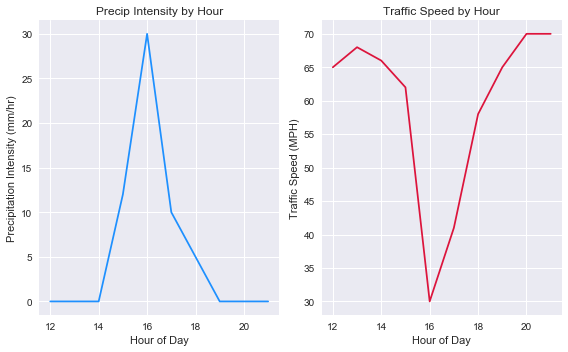

In [10]:
plt.style.use('seaborn')
# code from above but with the new styling
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5), sharex=True) # sharing the x axis will lock in the same settings for both plots

ax[0].plot(hour, precip, color='dodgerblue', label='Precip Intensity (mm/hr)')
ax[0].set_title('Precip Intensity by Hour')
ax[0].set_ylabel('Precipitation Intensity (mm/hr)')
ax[0].set_xlabel('Hour of Day')

ax[1].plot(hour, trafficSpd, color='crimson', label='Traffic Speed (MPH)')
ax[1].set_title('Traffic Speed by Hour')
ax[1].set_ylabel('Traffic Speed (MPH)')
ax[1].set_xlabel('Hour of Day')

fig.tight_layout() # just tightens up the area around the plots
plt.show()

# From this point on, matplotlib will use this styling.

We'll go back to a single plot to demonstrate some of the other options in matplotlib.

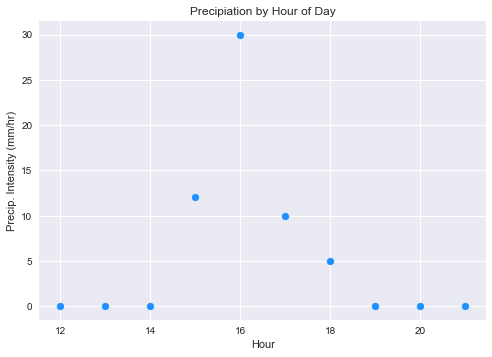

In [11]:
plt.scatter(hour, precip, color='dodgerblue')
plt.xlabel('Hour')
plt.ylabel('Precip. Intensity (mm/hr)')
plt.title('Precipiation by Hour of Day')
plt.show()

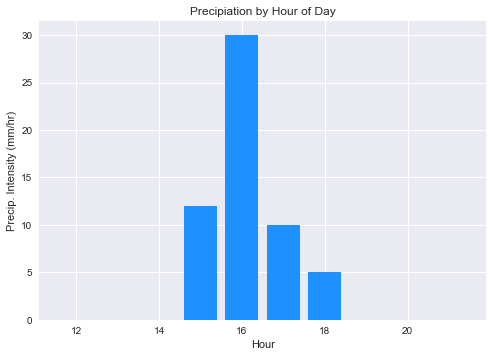

In [12]:
plt.bar(hour, precip, color='dodgerblue')
plt.xlabel('Hour')
plt.ylabel('Precip. Intensity (mm/hr)')
plt.title('Precipiation by Hour of Day')
plt.show()

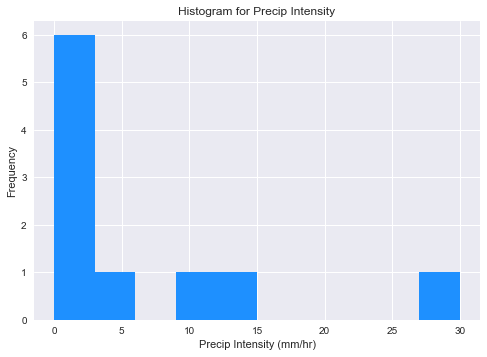

In [13]:
plt.hist(precip, color='dodgerblue')
plt.ylabel('Frequency')
plt.xlabel('Precip Intensity (mm/hr)')
plt.title('Histogram for Precip Intensity')
plt.show()

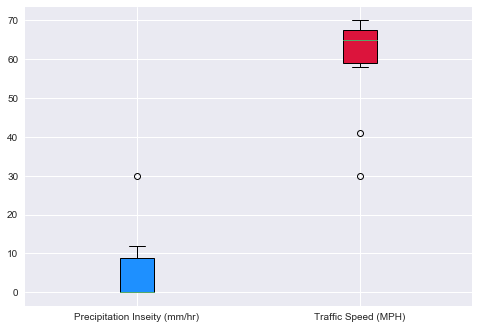

In [14]:
fig = plt.boxplot([precip, trafficSpd], labels=['Precipitation Inseity (mm/hr)', 'Traffic Speed (MPH)'],
           patch_artist=True)

# if you want to set the colors of the boxes from the patch_artist argument, you'll need to do something like below
colors = ['dodgerblue', 'crimson']
for patch, color in zip(fig['boxes'], colors):
    patch.set_facecolor(color)

The bottom line is Matplotlib is super flexible and can do quite a bit. It takes some time to get used to but if you run into problems, someone else has probably answered it already. Google around and you'll ususally be able to get unstuck.